## Final Project 
### Blindness Detection
#### Group: Gareth Sun zs389, Zimu Li zl898, Arman Syed as3778


### 1. Data Preprocess

In [1]:
# Import the Library we need
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.1
True


In [3]:
cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")
print(device)

cuda


In [4]:
print(tf.config.list_physical_devices('GPU'))

[]


In [5]:
# Load training Data
train_df = pd.read_csv('train.csv')
train_df['diagnosis'] = train_df['diagnosis'].astype(str)
train_df['pic_id'] = train_df['id_code'].astype(str)+'.png'
train_df.head()

,id_code,diagnosis,pic_id
0,000c1434d8d7,2,000c1434d8d7.png
1,001639a390f0,4,001639a390f0.png
2,0024cdab0c1e,1,0024cdab0c1e.png
3,002c21358ce6,0,002c21358ce6.png
4,005b95c28852,0,005b95c28852.png


In [6]:
# Data Load
preprocessor = ImageDataGenerator(
    # Normalization
    rescale=1/255,
    validation_split=0.2
)

# Set the batch and image size
image_size = 64
batch_size = 32

train_pic = preprocessor.flow_from_dataframe(
    dataframe=train_df,
    directory='train_images',
    x_col='pic_id',
    y_col='diagnosis',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training',
    target_size=(image_size, image_size)
)

test_pic = preprocessor.flow_from_dataframe(
    dataframe=train_df,
    directory='train_images',
    x_col='pic_id',
    y_col='diagnosis',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation',
    target_size=(image_size, image_size)
)

# Covert category into one-hot code
train_label = pd.get_dummies(train_df['diagnosis'])
num_classes = train_label.shape[1]
num_samples = train_label.shape[0]

print(num_classes)
print(num_samples)


Found 2930 validated image filenames belonging to 5 classes.
Found 732 validated image filenames belonging to 5 classes.
5
3662


### 2. Build CNN Model

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GaussianDropout

In [8]:
def cnn_model(image_size, num_classes):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [9]:
model = cnn_model(image_size, num_classes)
# Save the model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback

tm = ModelCheckpoint('version1', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

class AccuracyPlotter(Callback):
    def on_train_begin(self, logs={}):
        self.train_acc = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}):
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

    def on_train_end(self, logs={}):
        plt.figure(figsize=(20,10))
        plt.plot(range(1, len(self.train_acc) + 1), self.train_acc, label='Training Accuracy')
        plt.plot(range(1, len(self.val_acc) + 1), self.val_acc, label='Validation Accuracy')
        plt.title('Accuracy Plot')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.xticks(range(1, len(self.train_acc) + 1))
        plt.legend()
        plt.grid(True)
        plt.show()
        
plotter = AccuracyPlotter()

Epoch 1/50


91/91 [==============================] - ETA: 0s - loss: 0.9537 - accuracy: 0.6522
Epoch 1: val_loss improved from inf to 0.83726, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 180s 2s/step - loss: 0.9537 - accuracy: 0.6522 - val_loss: 0.8373 - val_accuracy: 0.6861
Epoch 2/50
91/91 [==============================] - ETA: 0s - loss: 0.7954 - accuracy: 0.7074
Epoch 2: val_loss improved from 0.83726 to 0.81092, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 227s 3s/step - loss: 0.7954 - accuracy: 0.7074 - val_loss: 0.8109 - val_accuracy: 0.7045
Epoch 3/50
91/91 [==============================] - ETA: 0s - loss: 0.7659 - accuracy: 0.7202
Epoch 3: val_loss improved from 0.81092 to 0.79720, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 239s 3s/step - loss: 0.7659 - accuracy: 0.7202 - val_loss: 0.7972 - val_accuracy: 0.7273
Epoch 4/50
91/91 [==============================] - ETA: 0s - loss: 0.7459 - accuracy: 0.7298
Epoch 4: val_loss improved from 0.79720 to 0.76567, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 240s 3s/step - loss: 0.7459 - accuracy: 0.7298 - val_loss: 0.7657 - val_accuracy: 0.7415
Epoch 5/50
91/91 [==============================] - ETA: 0s - loss: 0.7306 - accuracy: 0.7336
Epoch 5: val_loss did not improve from 0.76567
91/91 [==============================] - 232s 3s/step - loss: 0.7306 - accuracy: 0.7336 - val_loss: 0.8059 - val_accuracy: 0.7173
Epoch 6/50
91/91 [==============================] - ETA: 0s - loss: 0.7020 - accuracy: 0.7357
Epoch 6: val_loss improved from 0.76567 to 0.74723, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 208s 2s/step - loss: 0.7020 - accuracy: 0.7357 - val_loss: 0.7472 - val_accuracy: 0.7202
Epoch 7/50
91/91 [==============================] - ETA: 0s - loss: 0.7022 - accuracy: 0.7422
Epoch 7: val_loss did not improve from 0.74723
91/91 [==============================] - 209s 2s/step - loss: 0.7022 - accuracy: 0.7422 - val_loss: 0.7879 - val_accuracy: 0.7088
Epoch 8/50
91/91 [==============================] - ETA: 0s - loss: 0.6575 - accuracy: 0.7571
Epoch 8: val_loss improved from 0.74723 to 0.74332, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 204s 2s/step - loss: 0.6575 - accuracy: 0.7571 - val_loss: 0.7433 - val_accuracy: 0.7230
Epoch 9/50
91/91 [==============================] - ETA: 0s - loss: 0.6212 - accuracy: 0.7612
Epoch 9: val_loss did not improve from 0.74332
91/91 [==============================] - 189s 2s/step - loss: 0.6212 - accuracy: 0.7612 - val_loss: 0.8049 - val_accuracy: 0.7003
Epoch 10/50
91/91 [==============================] - ETA: 0s - loss: 0.5932 - accuracy: 0.7740
Epoch 10: val_loss did not improve from 0.74332
91/91 [==============================] - 190s 2s/step - loss: 0.5932 - accuracy: 0.7740 - val_loss: 0.7584 - val_accuracy: 0.7315
Epoch 11/50
91/91 [==============================] - ETA: 0s - loss: 0.5488 - accuracy: 0.7947
Epoch 11: val_loss did not improve from 0.74332
91/91 [==============================] - 189s 2s/step - loss: 0.5488 - accuracy: 0.7947 - val_loss: 0.7968 - val_accuracy: 0.6974
Epoch 12/50
91/91 [==============================] - 

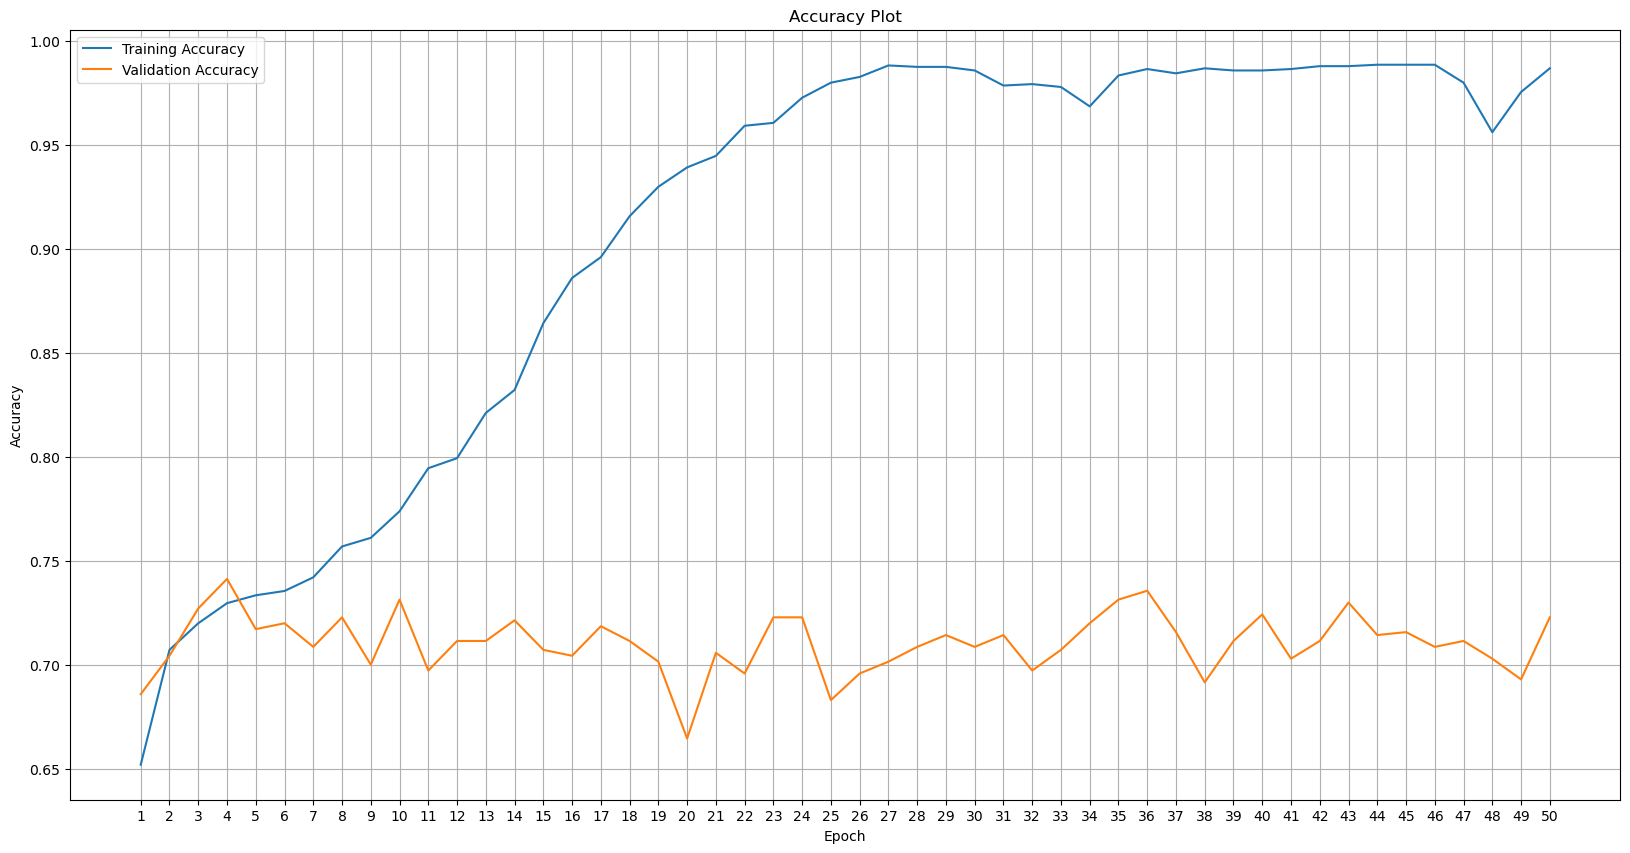

In [10]:
steps_per_epoch = 2930 // batch_size
validation_steps = 732 // batch_size
model.fit(
    train_pic,
    steps_per_epoch=steps_per_epoch, 
    epochs=50, 
    validation_data=test_pic,
    validation_steps=validation_steps,
    callbacks=[tm, plotter]
)

### 3. Give out Prediction Results

In [11]:
from keras.models import load_model
from math import ceil

trained_model = load_model('version1')

prediction_df = pd.read_csv('sample_submission.csv')
prediction_df['pic_id'] = prediction_df['id_code'].astype(str) + '.png'

In [12]:
prediction_pic = ImageDataGenerator(rescale=1/255)
pre_prediction = prediction_pic.flow_from_dataframe(
    dataframe=prediction_df,
    directory='test_images',
    x_col='pic_id',
    y_col=None,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    target_size=(image_size, image_size)
)

Found 1928 validated image filenames.


In [13]:
test_steps = ceil(pre_prediction.n / batch_size)

results = trained_model.predict(pre_prediction, steps=test_steps)

max_probability = np.argmax(results, axis=1)
prediction_df['diagnosis'] = max_probability

prediction_df.drop(columns=['pic_id'], inplace=True)
prediction_df.to_csv('submission.csv', index=False)

61/61 [==============================] - 30s 489ms/step
